## Import dependencies and load data

In [1]:
# Data analysis tools
import pandas as pd
import numpy as np
# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pandas.plotting import scatter_matrix 
# Training machine learning models
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#mis
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#load data
df = pd.read_csv('diabetes.csv')

## Data overview

> Overview
- A general view of the data, to understand its features, size, contents, data type, summary descriptive stats, duplicated and missing values
> Obejective
- Head
- Tail
- Sample
- Columns
- Shape
- Info
- Duplicates
- IsNull
- Describe

In [3]:
# head --> First 5(default) rows of dataframe(df)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# tail --> Last 5(default) rows of df
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
# sample --> random 10 rows of df
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
548            1      164             82             43       67  32.8   
184            4      141             74              0        0  27.6   
568            4      154             72             29      126  31.3   
100            1      163             72              0        0  39.0   
97             1       71             48             18       76  20.4   
513            2       91             62              0        0  27.3   
423            2      115             64             22        0  30.8   
748            3      187             70             22      200  36.4   
139            5      105             72             29      325  36.9   
295            6      151             62             31      120  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
548                     0.341   50        0  
184                     0.244   40        0  
568                     0.338   37        0  
100                     1.222   33        1  
97                      0.323   22        0  
513                     0.525   22        0  
423                     0.421   21        0  
748                     0.408   36        1  
139                     0.159   28        0  
295                     0.692   28        0

In [6]:
# columns --> A look at the all the features column and outcome column
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# shape --> Total number (size) of df (rows, columns)
df.shape

(768, 9)

In [8]:
# info --> summary info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# sum of  duplicate values
df.duplicated().sum()


0

In [10]:
# sum of missing values in each column in a descending order
df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# statistical summary of df
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Data cleaning

> Overview
- There were no duplicate data
- There were really no null values at first look
- But from Industry(Medical knowledge), It's absolutely very inappropriate and unrealistic for some of the features to have zero as min value.
- As such, the inappropriate zero values needs to be addressed and cleaned up.
> Objective
- Identify columns with inappropriate zero values
- Replace zeros with NaN, to reflect there missing-ness
- Then drop, fill, replace missing values with suitable imputation strategies

In [12]:
# replace zero columns with appropriate nan value
zero_columns = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI' ]
# Replace zeros with NaN
df[zero_columns] = df[zero_columns].replace(0, np.nan)
# Check for actual missing values
df.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

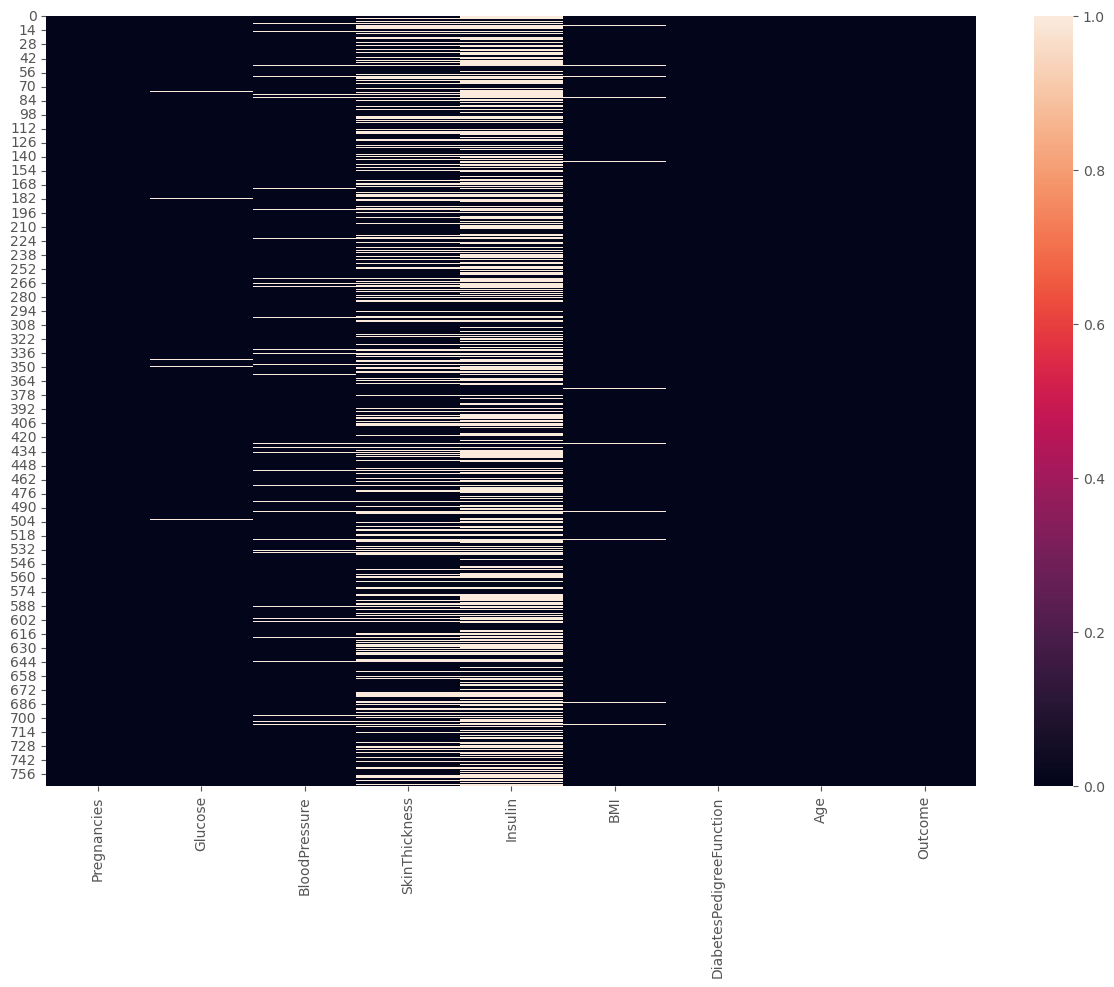

In [13]:
#Missing data visualization
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=True)

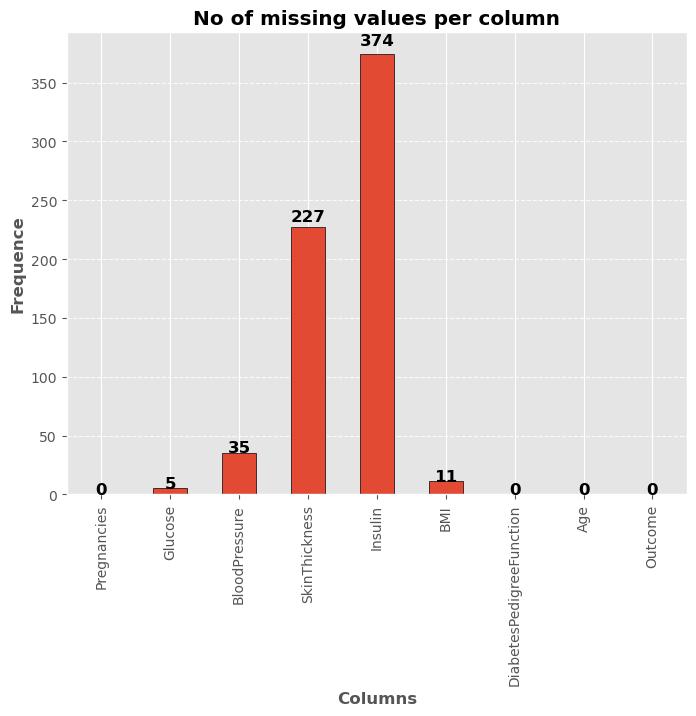

In [14]:
ax = df.isnull().sum().plot(kind="bar",  edgecolor='black', figsize=(8,6))
plt.title("No of missing values per column", fontweight='bold')
plt.xlabel("Columns", fontweight='bold')
plt.ylabel('Frequence', fontweight='bold')
# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=.85)
#Annotate the exact values on top of each bar with space (2.2% of bar height)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p. get_width() /2., p.get_height() + p.get_height() * 0.022), va='baseline', ha='center', fontweight='bold', fontsize=12, color='black')
plt.show()

In [15]:
def impute_missing_values(df):
    """
    Impute missing values in a DataFrame based on the median of each column,
    grouped by the 'Outcome' column.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.

    Returns:
        DataFrame: The DataFrame with missing values imputed.
    """
    # Loop through each column in the DataFrame, except 'Outcome'
    for col in df.columns:
        if col != 'Outcome':
            # Group by 'Outcome' and compute the median for the current column
            median_values = df.groupby('Outcome')[col].median()

            # Impute missing values for Outcome = 0
            df.loc[(df['Outcome'] == 0) & (df[col].isnull()), col] = median_values[0]

            # Impute missing values for Outcome = 1
            df.loc[(df['Outcome'] == 1) & (df[col].isnull()), col] = median_values[1]

    return df

# Apply the function
df = impute_missing_values(df)


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:

df.to_csv('./imputed.csv', index=False)

df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0           27.0    102.5  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0           70.0           27.0    102.5  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0           32.0    169.5  34.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Exploratory Data Analysis (EDA)

> Overview
- EDA helps uncover patterns, relationships, and trends in the data, providing a deeper understanding of the features and their interactions. It also reveals potential issues like skewness, outliers, or correlations that may impact model performance
  
> Objective
- Features
- Distribution
- Pairplot
- Scatterplot
- Corr

<Axes: xlabel='Age', ylabel='Count'>

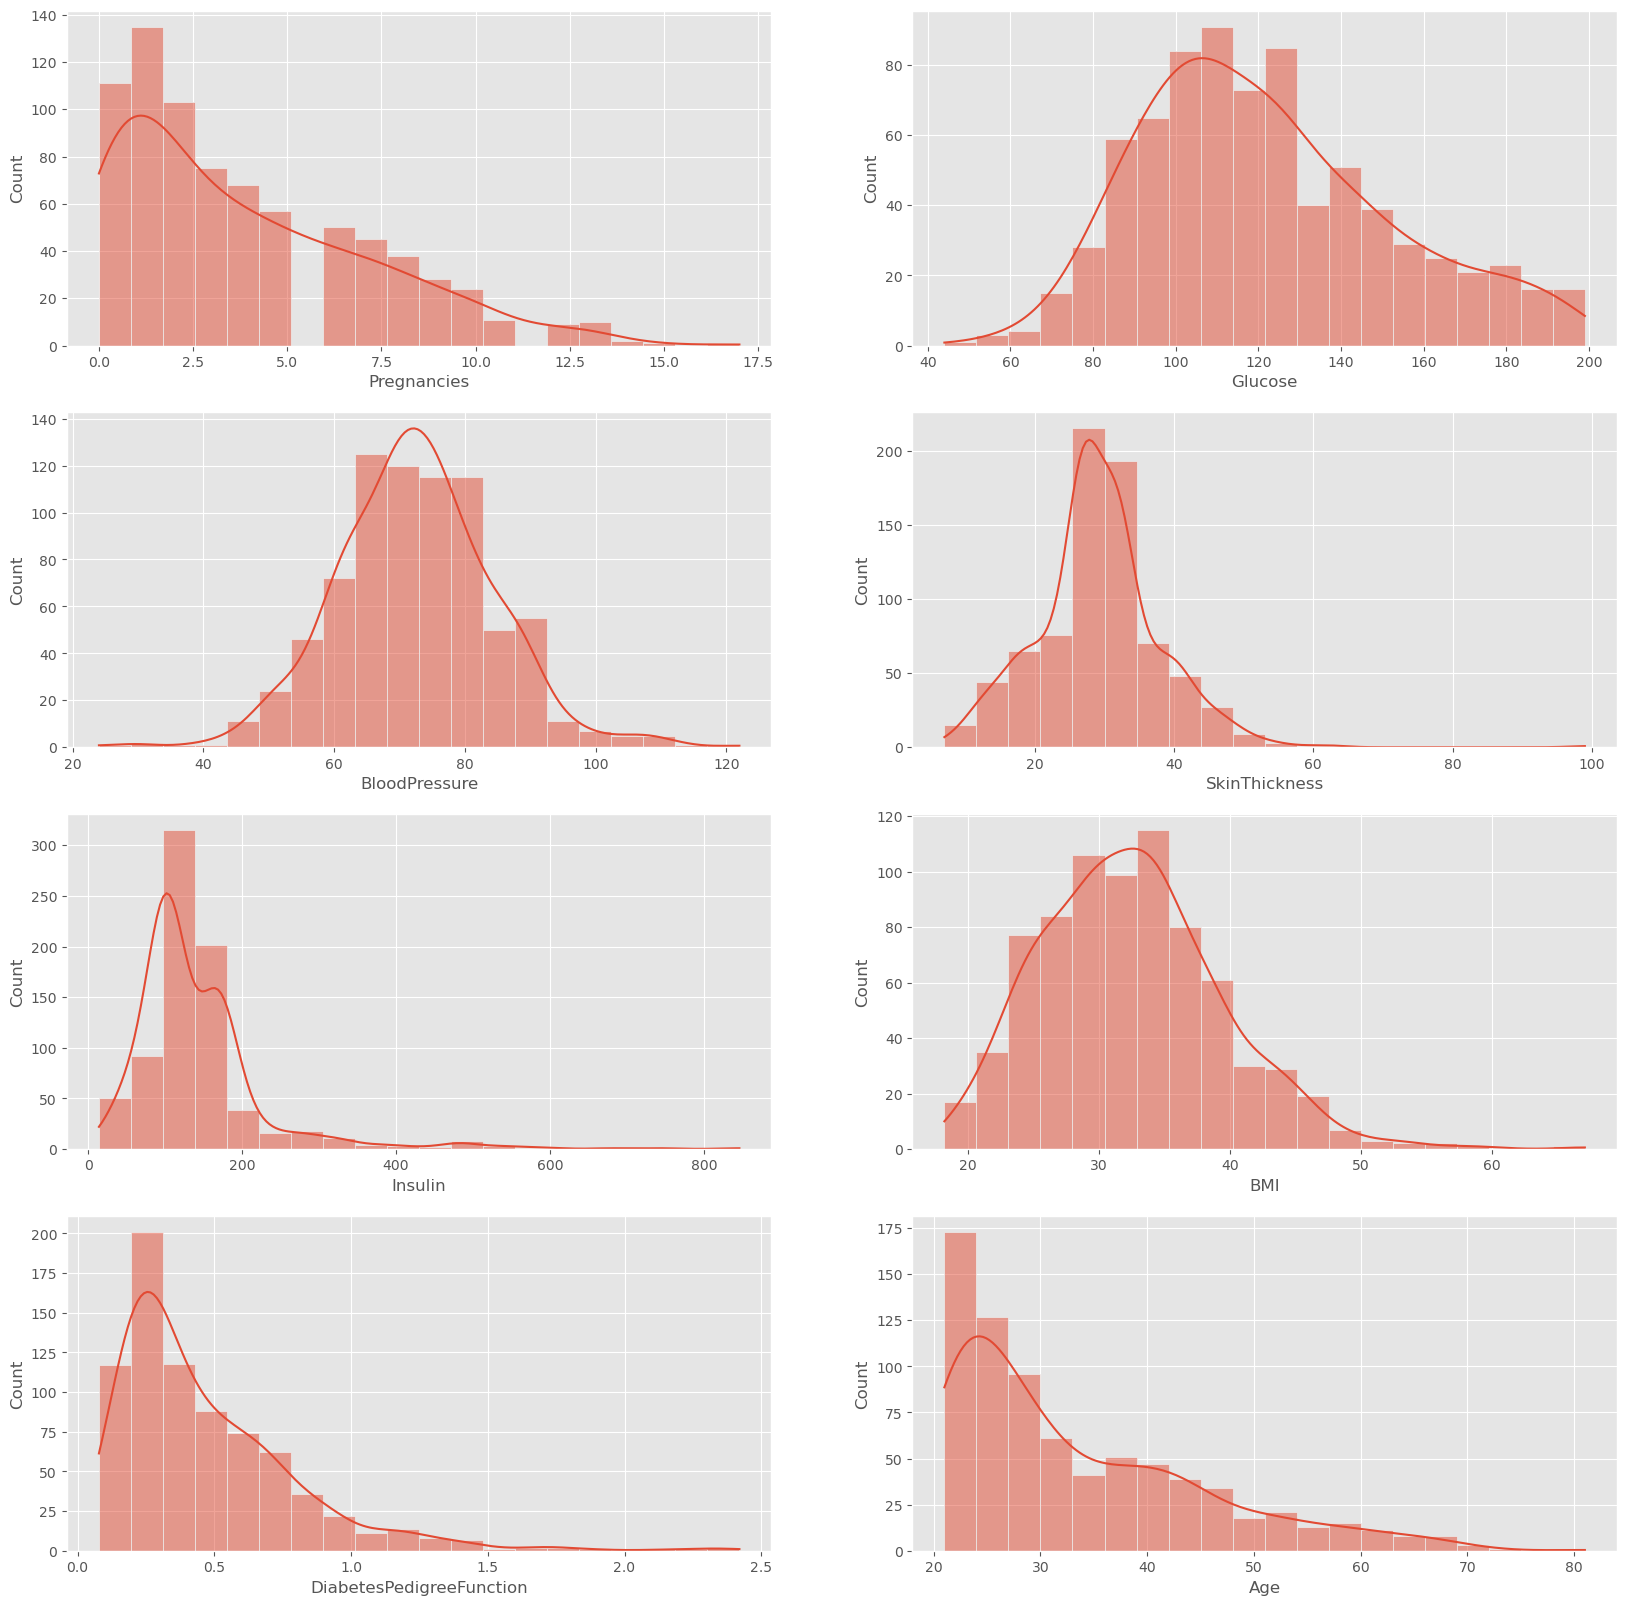

In [19]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.histplot(df.Pregnancies, bins=20, ax=ax[0,0],  kde=True)
sns.histplot(df.Glucose, bins=20, ax=ax[0,1],  kde=True)
sns.histplot(df.BloodPressure, bins=20, ax=ax[1,0],  kde=True)
sns.histplot(df.SkinThickness, bins=20, ax=ax[1,1],  kde=True)
sns.histplot(df.Insulin, bins=20, ax=ax[2,0],  kde=True)
sns.histplot(df.BMI, bins=20, ax=ax[2,1],  kde=True)
sns.histplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0],  kde=True)
sns.histplot(df.Age, bins=20, ax=ax[3,1],  kde=True)


### Feature: Outcome

Count outcome values: Outcome
0    500
1    268
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_21780\3049853054.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-diabetic','Diabetic'], fontsize=12, fontweight='bold')


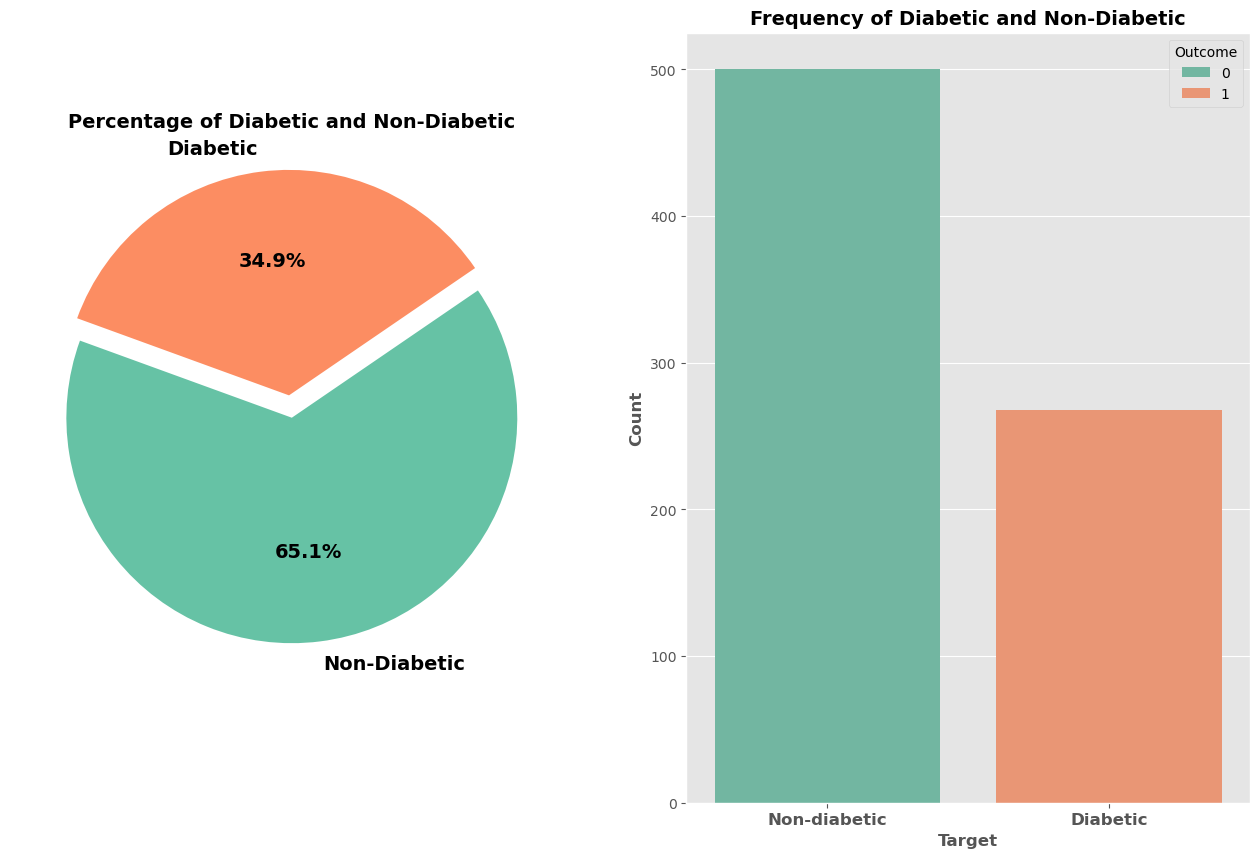

In [20]:
# (1 --> Diabetic, 0 --> Not Diabetic)
print('Count outcome values:', df.Outcome.value_counts())

# create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize =(16,10))
#Count plot
sns.countplot(data=df, x='Outcome', hue='Outcome', ax=axes[1], palette='Set2')
axes[1].set_title('Frequency of Diabetic and Non-Diabetic', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Target', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Non-diabetic','Diabetic'], fontsize=12, fontweight='bold')
#pie -> get count for each category
target_sizes = df.Outcome.value_counts().values
target_labels = ['Non-Diabetic', 'Diabetic']
#plot pie chart
axes[0].pie(target_sizes,explode=[0,0.1], labels=target_labels, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set2'), textprops={'fontsize':14,'fontweight': 'bold'})
axes[0].set_title('Percentage of Diabetic and Non-Diabetic', fontsize=14, fontweight='bold')
plt.show()


In [21]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.622000      70.844000      27.170000  117.172000   
1           4.865672  142.302239      75.272388      32.671642  187.615672   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.846000                  0.429734  31.190000  
1        35.398507                  0.550500  37.067164

### Pregnancies

In [22]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [23]:
# create a new bmi feature
preg_bins = [-1, 0, 2, 5, float('inf')]
preg_labels = ['Never', '1-2', '3-5', ' 5+']
df['preg_class'] = pd.cut(df['Pregnancies'], bins=preg_bins, labels=preg_labels, right=True)

df.preg_class.value_counts()

preg_class
1-2      238
 5+      219
3-5      200
Never    111
Name: count, dtype: int64

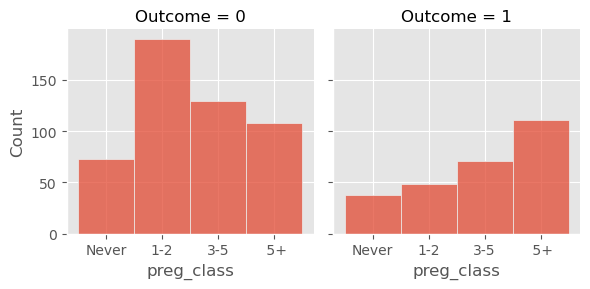

In [24]:
preg_class_wise = sns.FacetGrid(df, col='Outcome')
preg_class_wise.map(sns.histplot, 'preg_class')

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\3609515373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcome = df.groupby('preg_class')['Outcome'].mean()


Text(0.5, 1.0, 'Mean Diabetic outcome by pregnancy class')

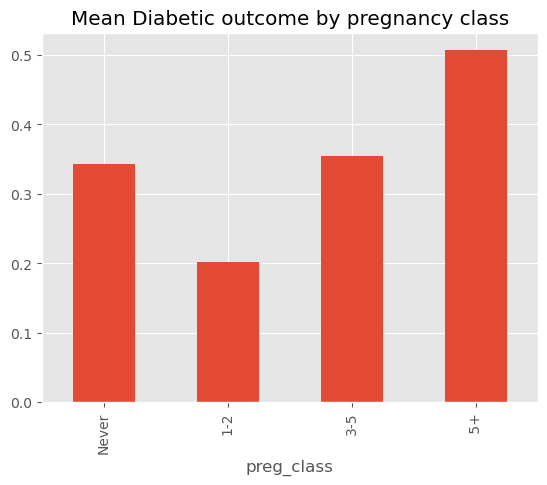

In [25]:
# visualize mean outcome

mean_outcome = df.groupby('preg_class')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by pregnancy class')

### Feature: Glucose class

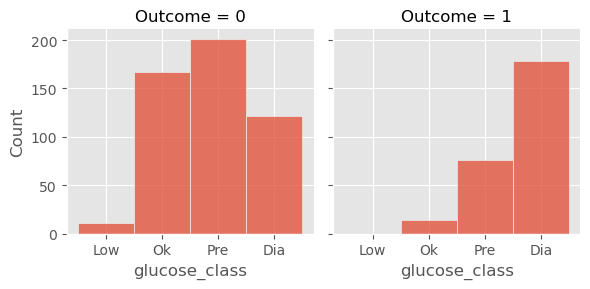

In [26]:
# create a new glucose feature
glu_labels =['Low', 'Ok', 'Pre', 'Dia']
glu_bins = [0, 70, 99, 125, df.Glucose.max()]
df['glucose_class'] = pd.cut(df['Glucose'], bins=glu_bins, labels=glu_labels, right=True)

glucose_class_wise = sns.FacetGrid(df, col='Outcome')
glucose_class_wise.map(sns.histplot, 'glucose_class')

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\3165356673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcome = df.groupby('glucose_class')['Outcome'].mean()


Text(0.5, 1.0, 'Mean Diabetic outcome by glucose class')

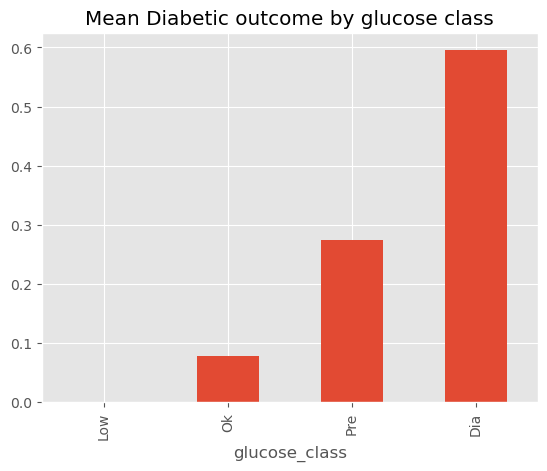

In [27]:
# visualize mean outcome

mean_outcome = df.groupby('glucose_class')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by glucose class')

### Feature : BMI

bmi_class
 Obe1    235
Over     179
Obe2     152
Ok       102
Extr      96
Low        4
Name: count, dtype: int64


<Figure size 1500x1200 with 0 Axes>

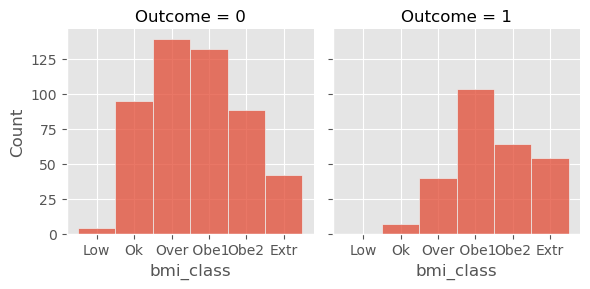

In [28]:
# create a new bmi feature
bmi_bins = [0, 18.5, 24.9, 29.9,34.9, 40, df.BMI.max() ]
bmi_labels = ['Low', 'Ok', 'Over', ' Obe1', 'Obe2', 'Extr']
df['bmi_class'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)


print(df.bmi_class.value_counts())
plt.figure(figsize=(15 ,12))
bmi_class_wise = sns.FacetGrid(df, col='Outcome')
bmi_class_wise.map(sns.histplot, 'bmi_class')

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\4002611971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcome = df.groupby('bmi_class')['Outcome'].mean()


Text(0.5, 1.0, 'Mean Diabetic outcome by bmi class')

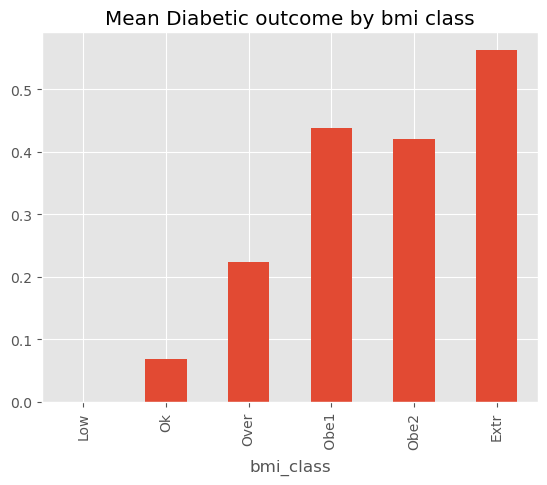

In [29]:

mean_outcome = df.groupby('bmi_class')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by bmi class')

### Feature: AGE

age_group
Young       514
Mid-age     181
Late-age     64
Aged          9
Name: count, dtype: int64


<Figure size 1500x1200 with 0 Axes>

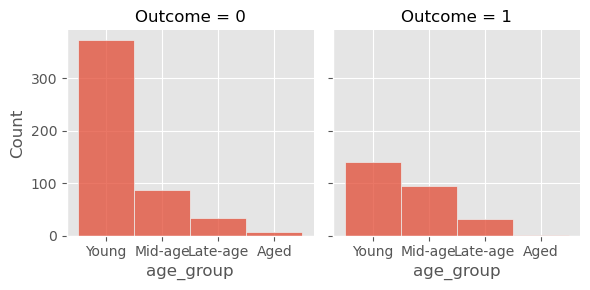

In [30]:
age_bins = [20, 36, 51, 66, df.Age.max()]
age_label =['Young', 'Mid-age', 'Late-age', 'Aged']
df['age_group'] = pd.cut(df.Age, bins=age_bins,labels=age_label)

print(df.age_group.value_counts())
plt.figure(figsize=(15 ,12))
age_group_wise = sns.FacetGrid(df, col='Outcome')
age_group_wise.map(sns.histplot, 'age_group')

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\930556706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outcome = df.groupby('age_group')['Outcome'].mean()


Text(0.5, 1.0, 'Mean Diabetic outcome by Age group')

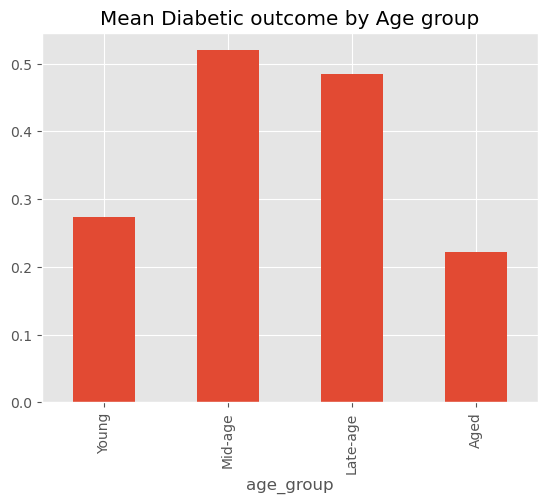

In [31]:

mean_outcome = df.groupby('age_group')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by Age group')

### Feature: RIsk

risk
3    281
2    201
1    141
4     94
0     51
Name: count, dtype: int64


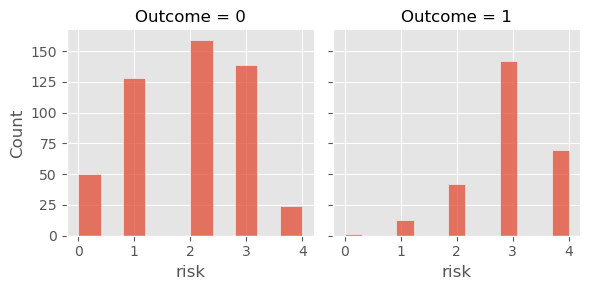

In [32]:
df['risk'] = ((df['Glucose'] >110).astype(int)+(df['BMI']>30).astype(int)+(df['BloodPressure']>130).astype(int)+(df['Insulin']>100).astype(int)+(df['Pregnancies']>5).astype(int))
print(df.risk.value_counts())
risk_wise = sns.FacetGrid(df, col='Outcome')
risk_wise.map(sns.histplot, 'risk')

Text(0.5, 1.0, 'Mean Diabetic outcome by Risk')

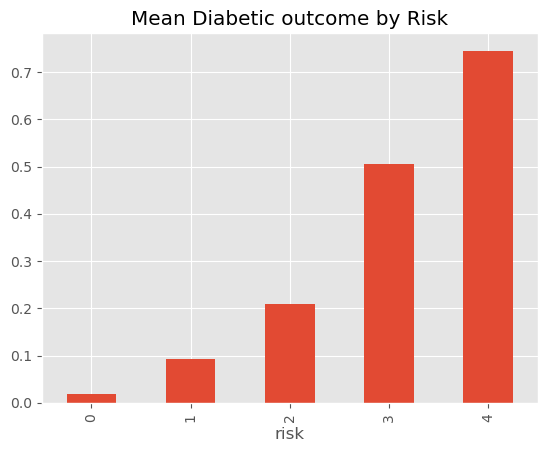

In [33]:
mean_outcome = df.groupby('risk')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by Risk')

### Feature : Insulin

insulin_class
Normal      496
Abnormal    272
Name: count, dtype: int64


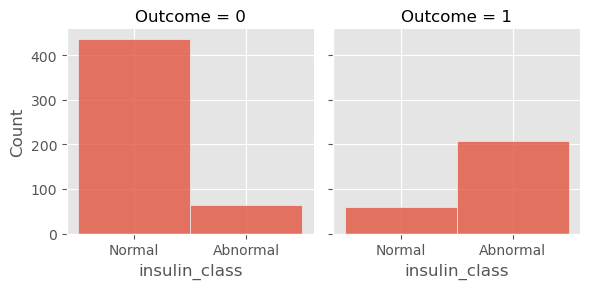

In [34]:
#create new feature for insulin
# if insulin >= 16 & insulin <=166 -> Normal
def set_insulin(row):
    if row['Insulin']>=16 and row['Insulin'] <= 166:
        return 'Normal'
    else:
        return 'Abnormal'
    
df = df.assign(insulin_class =df.apply(set_insulin, axis=1))

print(df.insulin_class.value_counts())
insulin_class_wise = sns.FacetGrid(df, col='Outcome')
insulin_class_wise.map(sns.histplot, 'insulin_class')

Text(0.5, 1.0, 'Mean Diabetic outcome by Insulin class')

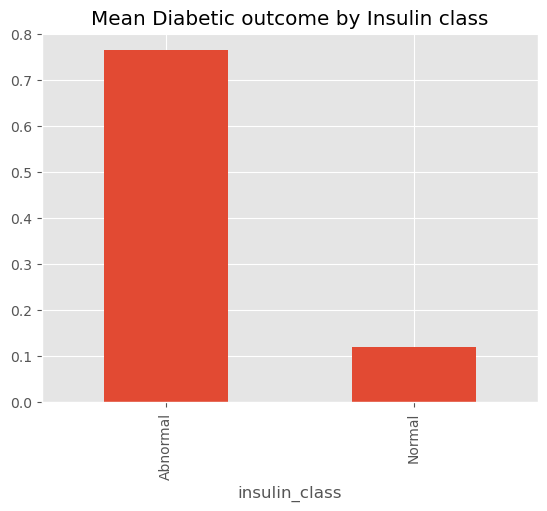

In [35]:
mean_outcome = df.groupby('insulin_class')['Outcome'].mean()

mean_outcome.plot(kind='bar')
plt.title('Mean Diabetic outcome by Insulin class')

In [36]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome preg_class glucose_class bmi_class  \
0                     0.627   50        1         5+           Dia      Obe1   
1                     0.351   31        0        1-2            Ok      Over   
2                     0.672   32        1         5+           Dia        Ok   
3                     0.167   21        0        1-2            Ok      Over   
4                     2.288   33        1      Never           Dia      Extr   

  age_group  risk insulin_class  
0   Mid-age     4      Abnormal  
1     Young     1        Normal  
2     Young     3      Abnormal  
3     Young     0        Normal  
4     Young     3      Abnormal

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>,
        <Axes: xlabel='risk', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='A

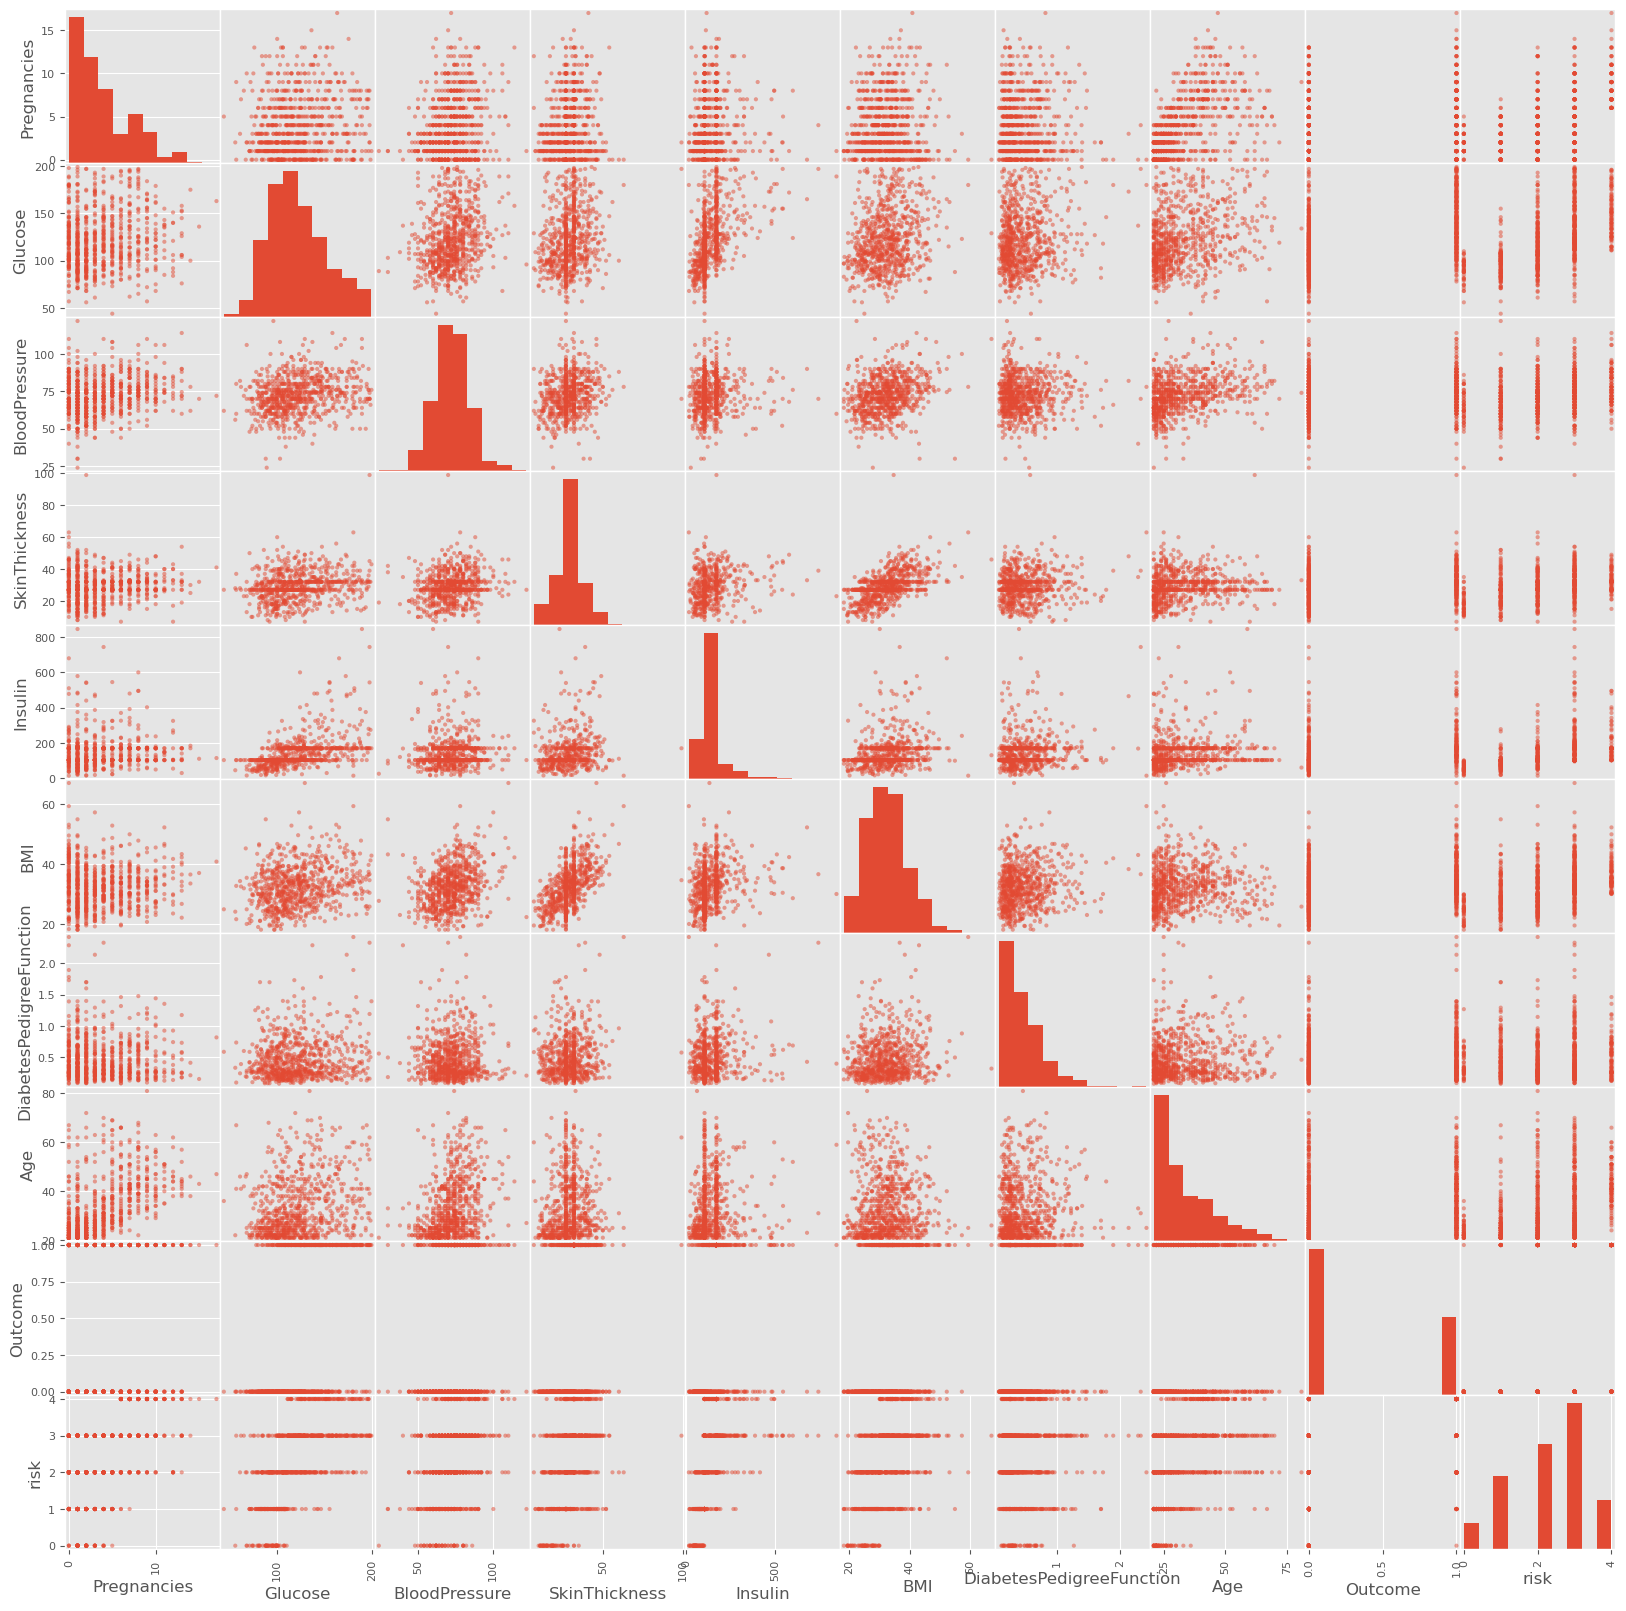

In [37]:
# scatter plot matrix
scatter_matrix(df, figsize=(20,20))

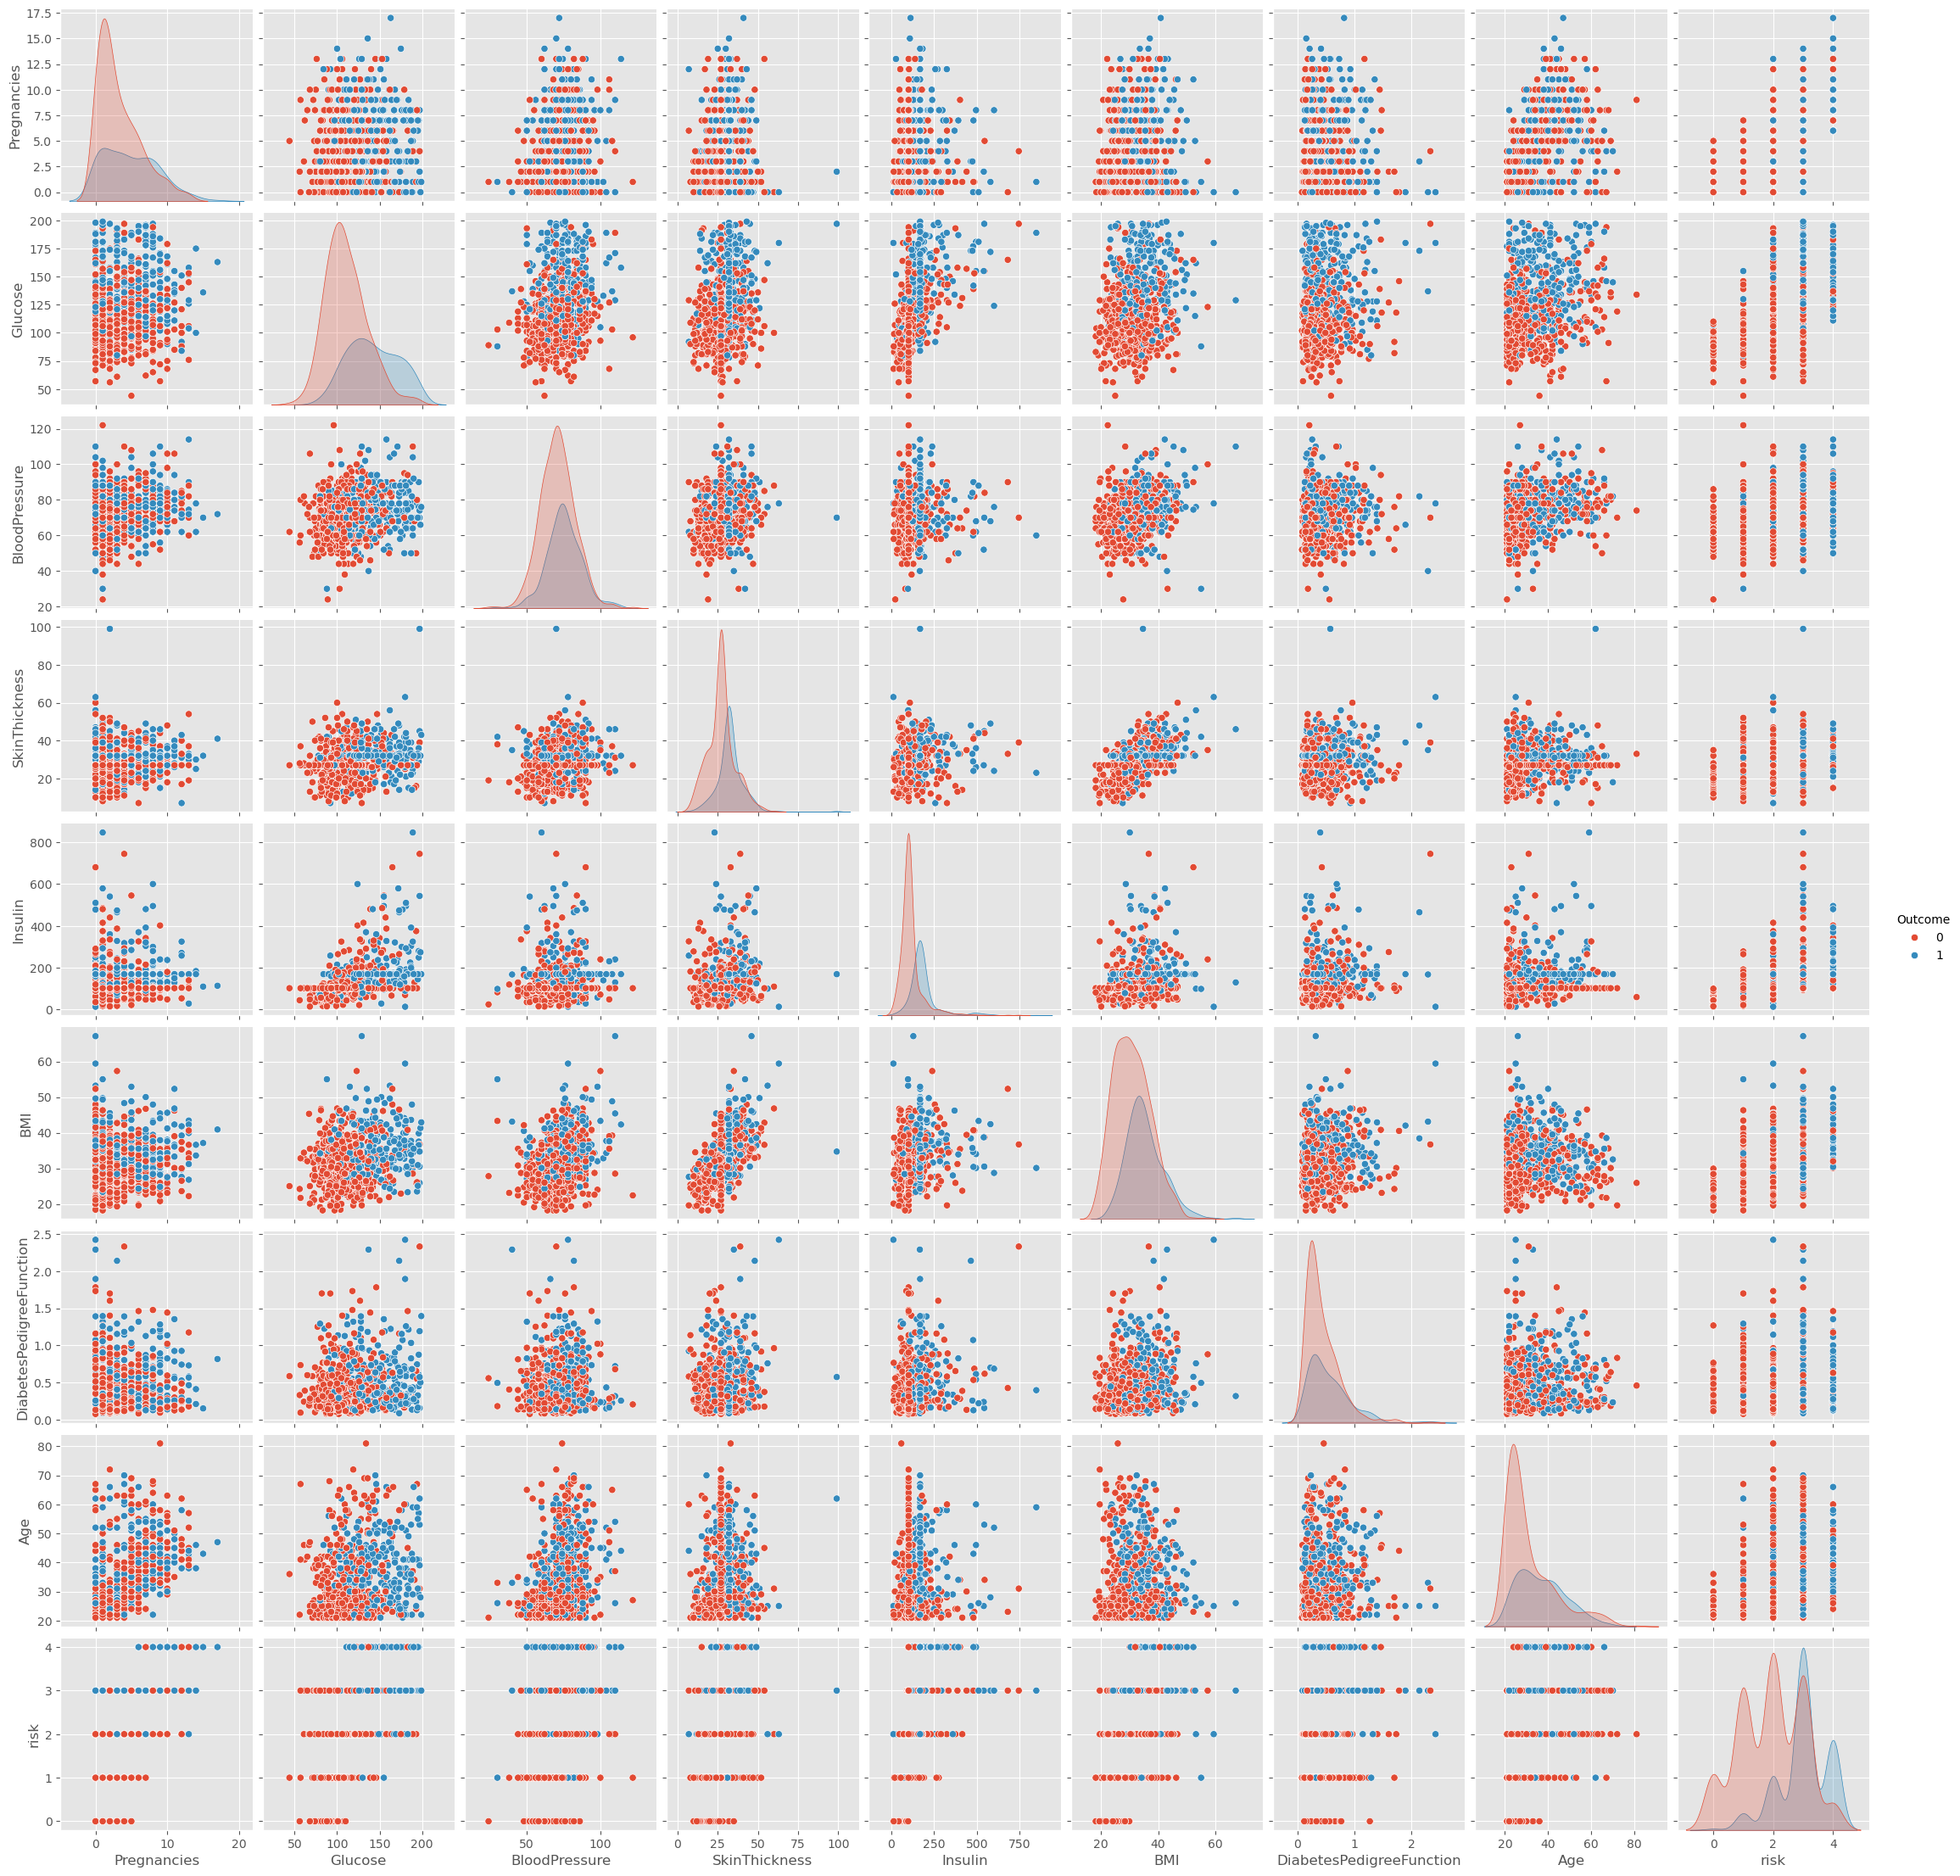

In [38]:
# pairplot
sns.pairplot(data=df, hue='Outcome')

In [39]:
#method 2
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130155       0.209151       0.089028   
Glucose                      0.130155  1.000000       0.225141       0.229289   
BloodPressure                0.209151  0.225141       1.000000       0.199349   
SkinThickness                0.089028  0.229289       0.199349       1.000000   
Insulin                      0.058767  0.490015       0.070128       0.200129   
BMI                          0.023890  0.236171       0.286399       0.566086   
DiabetesPedigreeFunction    -0.033523  0.138353      -0.001443       0.106280   
Age                          0.544341  0.268910       0.325135       0.129537   
Outcome                      0.221898  0.495990       0.174469       0.295138   
risk                         0.490851  0.605071       0.330144       0.394455   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.058767  0.023890                 -0.033523   
Glucose                   0.490015  0.236171                  0.138353   
BloodPressure             0.070128  0.286399                 -0.001443   
SkinThickness             0.200129  0.566086                  0.106280   
Insulin                   1.000000  0.238443                  0.146878   
BMI                       0.238443  1.000000                  0.152771   
DiabetesPedigreeFunction  0.146878  0.152771                  1.000000   
Age                       0.123629  0.027849                  0.033561   
Outcome                   0.377081  0.315577                  0.173844   
risk                      0.456898  0.471663                  0.068143   

                               Age   Outcome      risk  
Pregnancies               0.544341  0.221898  0.490851  
Glucose                   0.268910  0.495990  0.605071  
BloodPressure             0.325135  0.174469  0.330144  
SkinThickness             0.129537  0.295138  0.394455  
Insulin                   0.123629  0.377081  0.456898  
BMI                       0.027849  0.315577  0.471663  
DiabetesPedigreeFunction  0.033561  0.173844  0.068143  
Age                       1.000000  0.238356  0.418157  
Outcome                   0.238356  1.000000  0.465670  
risk                      0.418157  0.465670  1.000000

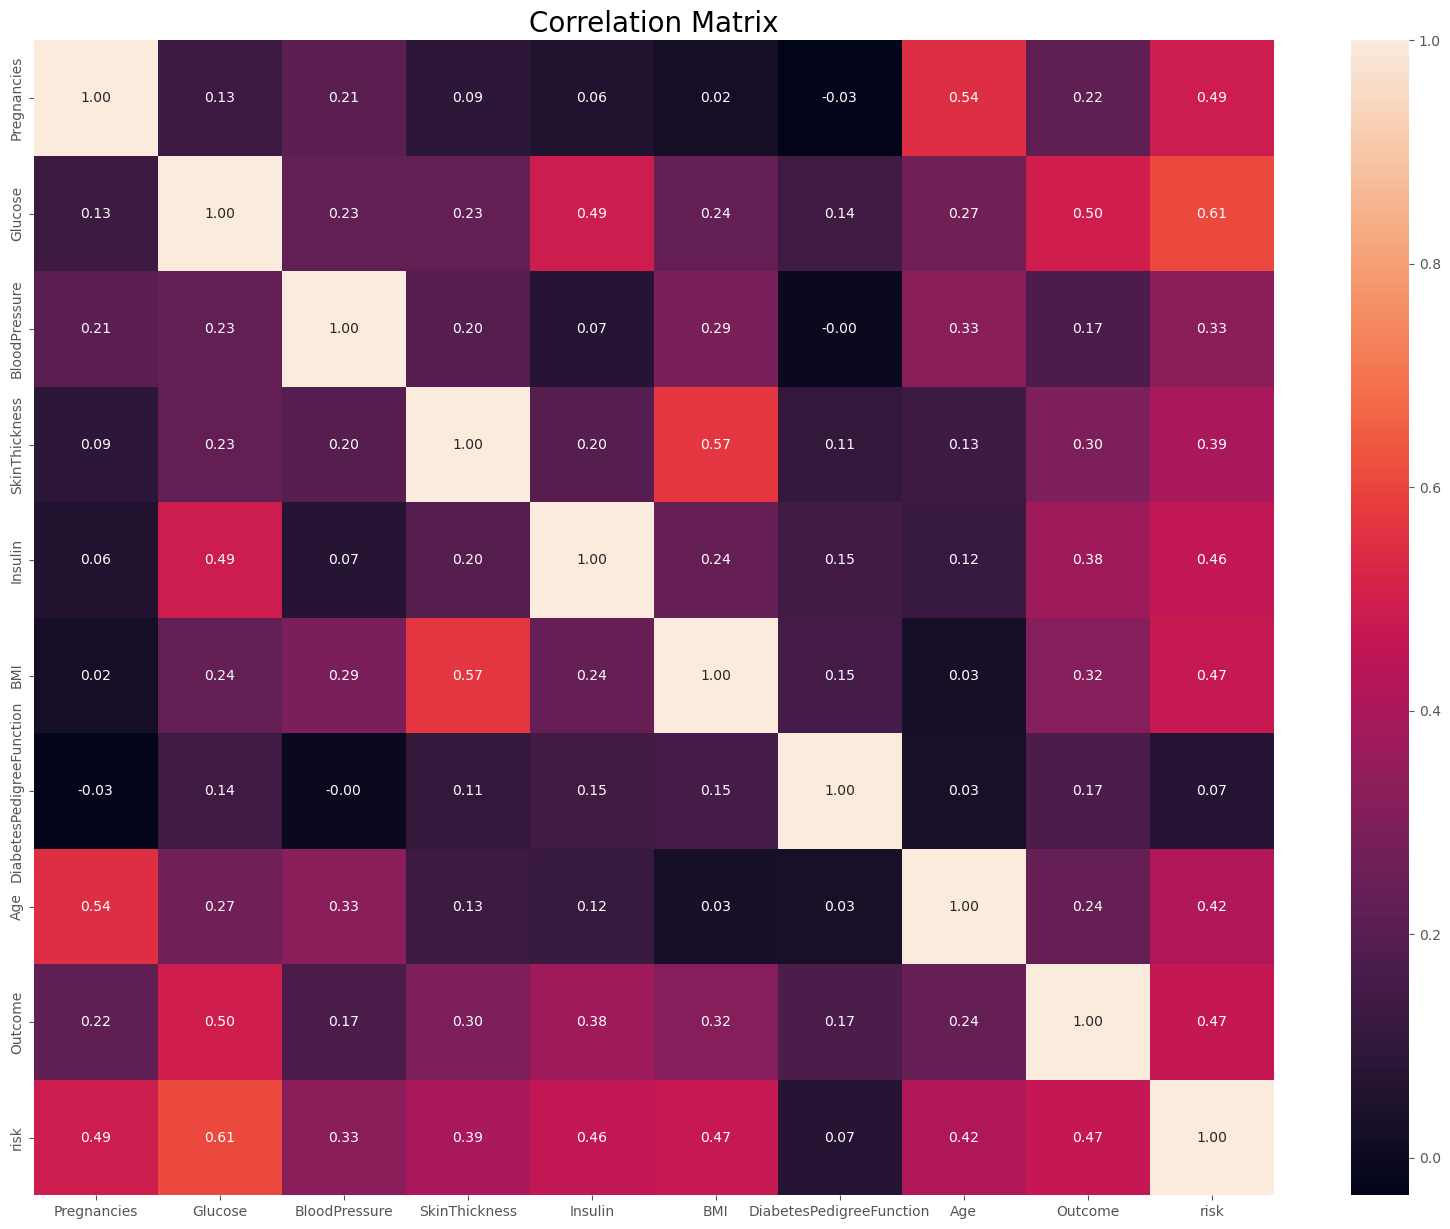

In [40]:
f, ax = plt.subplots(figsize=[20,15])
ax = sns.heatmap(corr_matrix, fmt='.2f', annot=True,)
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

### Outlier 

<Axes: >

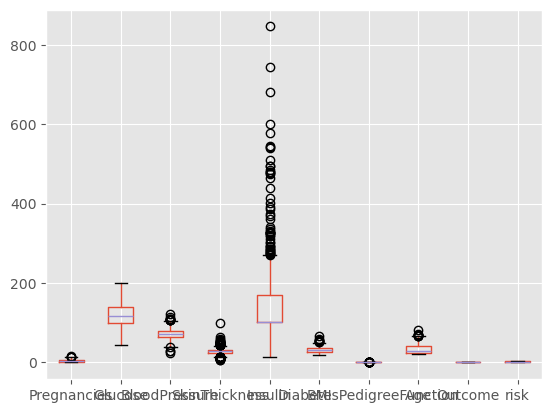

In [41]:
df.boxplot()

In [42]:
#Fixing Pregnancy Outliers
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Pregnancies'] >upper, 'Pregnancies'] = upper
df.loc[df['Pregnancies'] < lower, 'Pregnancies'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\1960648827.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Pregnancies'] >upper, 'Pregnancies'] = upper


In [43]:
#Fixing Pregnancy Outliers
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['SkinThickness'] >upper, 'SkinThickness'] = upper
df.loc[df['SkinThickness'] < lower, 'SkinThickness'] = lower

In [44]:
#Fixing Pregnancy Outliers
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BloodPressure'] >upper, 'BloodPressure'] = upper
df.loc[df['BloodPressure'] < lower, 'BloodPressure'] = lower

In [45]:
#Fixing Pregnancy Outliers
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction'] >upper, 'DiabetesPedigreeFunction'] = upper
df.loc[df['DiabetesPedigreeFunction'] < lower, 'DiabetesPedigreeFunction'] = lower

In [46]:
#Fixing Pregnancy Outliers
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BMI'] >upper, 'BMI'] = upper
df.loc[df['BMI'] < lower, 'BMI'] = lower

In [47]:
#Fixing Pregnancy Outliers
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Age'] >upper, 'Age'] = upper
df.loc[df['Age'] < lower, 'Age'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\3993014162.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'] >upper, 'Age'] = upper


In [48]:
#Fixing Pregnancy Outliers
Q1 = df.risk.quantile(0.25)
Q3 = df.risk.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['risk'] >upper, 'risk'] = upper
df.loc[df['risk'] < lower, 'risk'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_21780\4229296328.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.875' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['risk'] >upper, 'risk'] = upper


<Axes: >

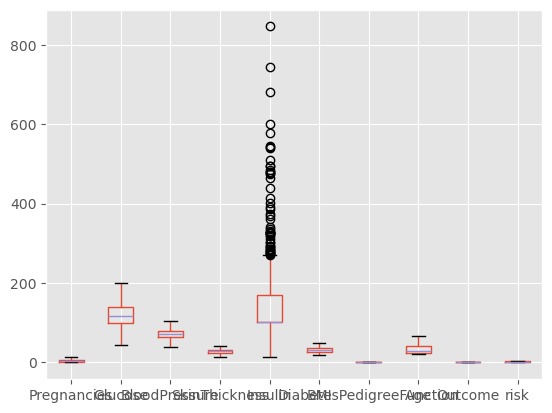

In [49]:
df.boxplot()

In [50]:
#Fixing Pregnancy Outliers
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin'] >upper, 'Insulin'] = upper
df.loc[df['Insulin'] < lower, 'Insulin'] = lower

<Axes: >

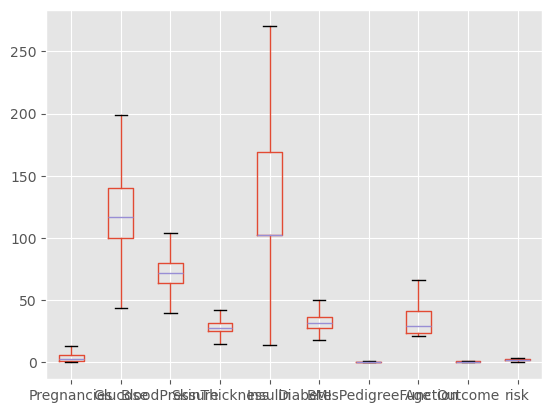

In [51]:
df.boxplot()

In [52]:
df.to_csv('./extended.csv', index=False)


## DATA PREPROCESSING

In [53]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome preg_class glucose_class bmi_class  \
0                     0.627  50.0        1         5+           Dia      Obe1   
1                     0.351  31.0        0        1-2            Ok      Over   
2                     0.672  32.0        1         5+           Dia        Ok   
3                     0.167  21.0        0        1-2            Ok      Over   
4                     1.200  33.0        1      Never           Dia      Extr   

  age_group  risk insulin_class  
0   Mid-age   4.0      Abnormal  
1     Young   1.0        Normal  
2     Young   3.0      Abnormal  
3     Young   0.0        Normal  
4     Young   3.0      Abnormal

In [54]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
preg_class                  0
glucose_class               0
bmi_class                   0
age_group                   0
risk                        0
insulin_class               0
dtype: int64

In [55]:

# One hot encode the categorical columns

df  = pd.get_dummies(df, columns=['bmi_class', 'insulin_class', 'glucose_class' ], drop_first=True, dtype=int)

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome preg_class  ... risk  bmi_class_Ok  \
0                     0.627  50.0        1         5+  ...  4.0             0   
1                     0.351  31.0        0        1-2  ...  1.0             0   
2                     0.672  32.0        1         5+  ...  3.0             1   
3                     0.167  21.0        0        1-2  ...  0.0             0   
4                     1.200  33.0        1      Never  ...  3.0             0   

   bmi_class_Over  bmi_class_ Obe1  bmi_class_Obe2  bmi_class_Extr  \
0               0                1               0               0   
1               1                0               0               0   
2               0                0               0               0   
3               1                0               0               0   
4               0                0               0               1   

   insulin_class_Normal  glucose_class_Ok  glucose_class_Pre  \
0                     0                 0                  0   
1                     1                 1                  0   
2                     0                 0                  0   
3                     1                 1                  0   
4                     0                 0                  0   

   glucose_class_Dia  
0                  1  
1                  0  
2                  1  
3                  0  
4                  1  

[5 rows x 21 columns]

In [56]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'preg_class',
       'age_group', 'risk', 'bmi_class_Ok', 'bmi_class_Over',
       'bmi_class_ Obe1', 'bmi_class_Obe2', 'bmi_class_Extr',
       'insulin_class_Normal', 'glucose_class_Ok', 'glucose_class_Pre',
       'glucose_class_Dia'],
      dtype='object')

In [57]:
categorical_df = df[['bmi_class_Ok', 'bmi_class_Over',
       'bmi_class_ Obe1', 'bmi_class_Obe2', 'bmi_class_Extr',
       'insulin_class_Normal', 'glucose_class_Ok', 'glucose_class_Pre',
       'glucose_class_Dia']]

In [58]:
numerical_df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]
numerical_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     1.200  33.0

In [59]:
num_col = numerical_df.columns
index = numerical_df.index

In [60]:
 # Scale numerical data
transformer = RobustScaler().fit(numerical_df)
numerical_df = transformer.transform(numerical_df)
numerical_df = pd.DataFrame(numerical_df, columns=num_col, index=index)
 

In [61]:
numerical_df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.765432          0.000       1.000000  1.000000  0.170330   
1         -0.4 -0.790123         -0.375       0.142857  0.000000 -0.598901   
2          1.0  1.629630         -0.500       0.571429  1.000000 -0.961538   
3         -0.4 -0.691358         -0.375      -0.714286 -0.126866 -0.434066   
4         -0.6  0.493827         -2.000       1.000000  0.977612  1.214286   

   DiabetesPedigreeFunction       Age  
0                  0.665359  1.235294  
1                 -0.056209  0.117647  
2                  0.783007  0.176471  
3                 -0.537255 -0.470588  
4                  2.163399  0.235294

In [62]:
Y = df.Outcome
X = pd.concat([numerical_df, categorical_df], axis=1)

In [63]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [64]:
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            0.6  0.765432          0.000       1.000000  1.000000  0.170330   
1           -0.4 -0.790123         -0.375       0.142857  0.000000 -0.598901   
2            1.0  1.629630         -0.500       0.571429  1.000000 -0.961538   
3           -0.4 -0.691358         -0.375      -0.714286 -0.126866 -0.434066   
4           -0.6  0.493827         -2.000       1.000000  0.977612  1.214286   
..           ...       ...            ...            ...       ...       ...   
763          1.4 -0.395062          0.250       2.071429  1.156716  0.093407   
764         -0.2  0.123457         -0.125      -0.142857  0.000000  0.521978   
765          0.4  0.098765          0.000      -0.714286  0.141791 -0.642857   
766         -0.4  0.222222         -0.750       0.571429  1.000000 -0.214286   
767         -0.4 -0.592593         -0.125       0.428571  0.000000 -0.181319   

     DiabetesPedigreeFunction       Age  bmi_class_Ok  bmi_class_Over  \
0                    0.665359  1.235294             0               0   
1                   -0.056209  0.117647             0               1   
2                    0.783007  0.176471             1               0   
3                   -0.537255 -0.470588             0               1   
4                    2.163399  0.235294             0               0   
..                        ...       ...           ...             ...   
763                 -0.526797  2.000000             0               0   
764                 -0.084967 -0.117647             0               0   
765                 -0.333333  0.058824             0               1   
766                 -0.061438  1.058824             0               0   
767                 -0.150327 -0.352941             0               0   

     bmi_class_ Obe1  bmi_class_Obe2  bmi_class_Extr  insulin_class_Normal  \
0                  1               0               0                     0   
1                  0               0               0                     1   
2                  0               0               0                     0   
3                  0               0               0                     1   
4                  0               0               1                     0   
..               ...             ...             ...                   ...   
763                1               0               0                     0   
764                0               1               0                     1   
765                0               0               0                     1   
766                1               0               0                     0   
767                1               0               0                     1   

     glucose_class_Ok  glucose_class_Pre  glucose_class_Dia  
0                   0                  0                  1  
1                   1                  0                  0  
2                   0                  0                  1  
3                   1                  0                  0  
4                   0                  0                  1  
..                ...                ...                ...  
763                 0                  1                  0  
764                 0                  1                  0  
765                 0                  1                  0  
766                 0                  0                  1  
767                 1                  0                  0  

[768 rows x 17 columns]

## Modelling

In [65]:

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [66]:
print('X train shape',X_train.shape)
print('Y train shape', Y_train.shape)


X train shape (614, 17)
Y train shape (614,)


In [67]:
# List models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient boosting': GradientBoostingClassifier(random_state=42),
}

# Dictionary to store results
model_results = []

for name, model in models.items():
    print(f'\n--- Evaluating {name} ---')
    
    #Cross validation prediction
    cv_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1)
    y_pred_cv = cross_val_predict(model, X_train, Y_train, cv=10, n_jobs=-1)
    
    # Fit model on Train data
    model.fit(X_train, Y_train)
    y_pred_test = model.predict(X_test)
    
    # CV Metrics
    cv_mean_accuracy = cv_scores.mean()
    cv_conf_matrix = confusion_matrix(Y_train, y_pred_cv)
    cv_precision = precision_score(Y_train, y_pred_cv, average='weighted')
    cv_recall = recall_score(Y_train, y_pred_cv, average='weighted')
    cv_f1 = f1_score(Y_train, y_pred_cv, average='weighted')
    cv_classification = classification_report(Y_train, y_pred_cv)
    
    # Test Set Metrics
    test_accuracy = accuracy_score(Y_test, y_pred_test)
    test_conf_matrix = confusion_matrix(Y_test, y_pred_test)
    test_precision = precision_score(Y_test, y_pred_test, average='weighted')
    test_recall = recall_score(Y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(Y_test, y_pred_test, average='weighted')
    test_classification = classification_report(Y_test, y_pred_test)
    
    # Save result
    model_results.append({
        'Model': name,
        'Cross-Validation Accuracy': cv_mean_accuracy,
        'CV Conf Matrix': cv_conf_matrix,
        'CV Precision': cv_precision,
        'CV F1 score': cv_f1,
        'CV Recall': cv_recall,
        'CV Report': cv_classification,
        "Test Accuracy": test_accuracy,
        'Test Conf Matrix': test_conf_matrix,
        'Test Precision': test_precision,
        'Test F1 score': test_f1,
        'Test Recall': test_recall,
        'Test Report': test_classification
    })
    
    # Print metrics
    print(f'CV F1 Score :{cv_f1: .2f}')
    print(f'CV Recall Score :{cv_recall: .2f}')
    print(f'Test F1 Score :{test_f1: .2f}')
    print(f'Test Recall Score :{test_recall: .2f}')
    
    print('\n Test set classification report:')
    print(test_classification)


--- Evaluating Logistic Regression ---
CV F1 Score : 0.85
CV Recall Score : 0.85
Test F1 Score : 0.86
Test Recall Score : 0.86

 Test set classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       100
           1       0.79      0.81      0.80        54

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.84       154
weighted avg       0.86      0.86      0.86       154


--- Evaluating Random Forest ---
CV F1 Score : 0.88
CV Recall Score : 0.88
Test F1 Score : 0.88
Test Recall Score : 0.88

 Test set classification report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       100
           1       0.83      0.81      0.82        54

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154


--- Evaluating Support Vect

In [68]:
model_results

[{'Model': 'Logistic Regression',
  'Cross-Validation Accuracy': 0.8516922263352724,
  'CV Conf Matrix': array([[361,  39],
         [ 52, 162]], dtype=int64),
  'CV Precision': 0.8503492114240888,
  'CV F1 score': 0.8506551320369764,
  'CV Recall': 0.8517915309446255,
  'CV Report': '              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.89       400\n           1       0.81      0.76      0.78       214\n\n    accuracy                           0.85       614\n   macro avg       0.84      0.83      0.83       614\nweighted avg       0.85      0.85      0.85       614\n',
  'Test Accuracy': 0.8571428571428571,
  'Test Conf Matrix': array([[88, 12],
         [10, 44]], dtype=int64),
  'Test Precision': 0.858600583090379,
  'Test F1 score': 0.8577200577200578,
  'Test Recall': 0.8571428571428571,
  'Test Report': '              precision    recall  f1-score   support\n\n           0       0.90      0.88      0.89       100\n           1       0

In [69]:
df_model_results = pd.DataFrame(model_results)

df_model_results_sorted = df_model_results.sort_values(by=['Test F1 score', 'Test Recall'], ascending=False).reset_index(drop=True)
df_model_results_sorted

Model  Cross-Validation Accuracy          CV Conf Matrix  \
0       Gradient boosting                   0.887652  [[373, 27], [42, 172]]   
1           Random Forest                   0.876256  [[365, 35], [41, 173]]   
2  Support Vector Machine                   0.861634  [[361, 39], [46, 168]]   
3     Logistic Regression                   0.851692  [[361, 39], [52, 162]]   
4           Decision Tree                   0.824114  [[347, 53], [55, 159]]   
5     K-Nearest Neighbour                   0.832205  [[355, 45], [58, 156]]   
6             Naive Bayes                   0.816050  [[327, 73], [40, 174]]   

   CV Precision  CV F1 score  CV Recall  \
0      0.886780     0.886616   0.887622   
1      0.875564     0.875802   0.876221   
2      0.860704     0.861013   0.861564   
3      0.850349     0.850655   0.851792   
4      0.823736     0.823911   0.824104   
5      0.830481     0.830961   0.832248   
6      0.825987     0.818589   0.815961   

                                           CV Report  Test Accuracy  \
0                precision    recall  f1-score   ...       0.883117   
1                precision    recall  f1-score   ...       0.876623   
2                precision    recall  f1-score   ...       0.870130   
3                precision    recall  f1-score   ...       0.857143   
4                precision    recall  f1-score   ...       0.857143   
5                precision    recall  f1-score   ...       0.831169   
6                precision    recall  f1-score   ...       0.792208   

       Test Conf Matrix  Test Precision  Test F1 score  Test Recall  \
0   [[92, 8], [10, 44]]        0.882392       0.882593     0.883117   
1   [[91, 9], [10, 44]]        0.876164       0.876354     0.876623   
2   [[89, 11], [9, 45]]        0.871488       0.870655     0.870130   
3  [[88, 12], [10, 44]]        0.858601       0.857720     0.857143   
4  [[89, 11], [11, 43]]        0.857143       0.857143     0.857143   
5  [[86, 14], [12, 42]]        0.832825       0.831851     0.831169   
6   [[74, 26], [6, 48]]        0.828098       0.796898     0.792208   

                                         Test Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-score   ...  
6                precision    recall  f1-score   ...

In [70]:
df_model_results_sorted.to_csv('./df_model_results.csv', index=False)

Text(0.5, 135.7222222222222, 'Metric')

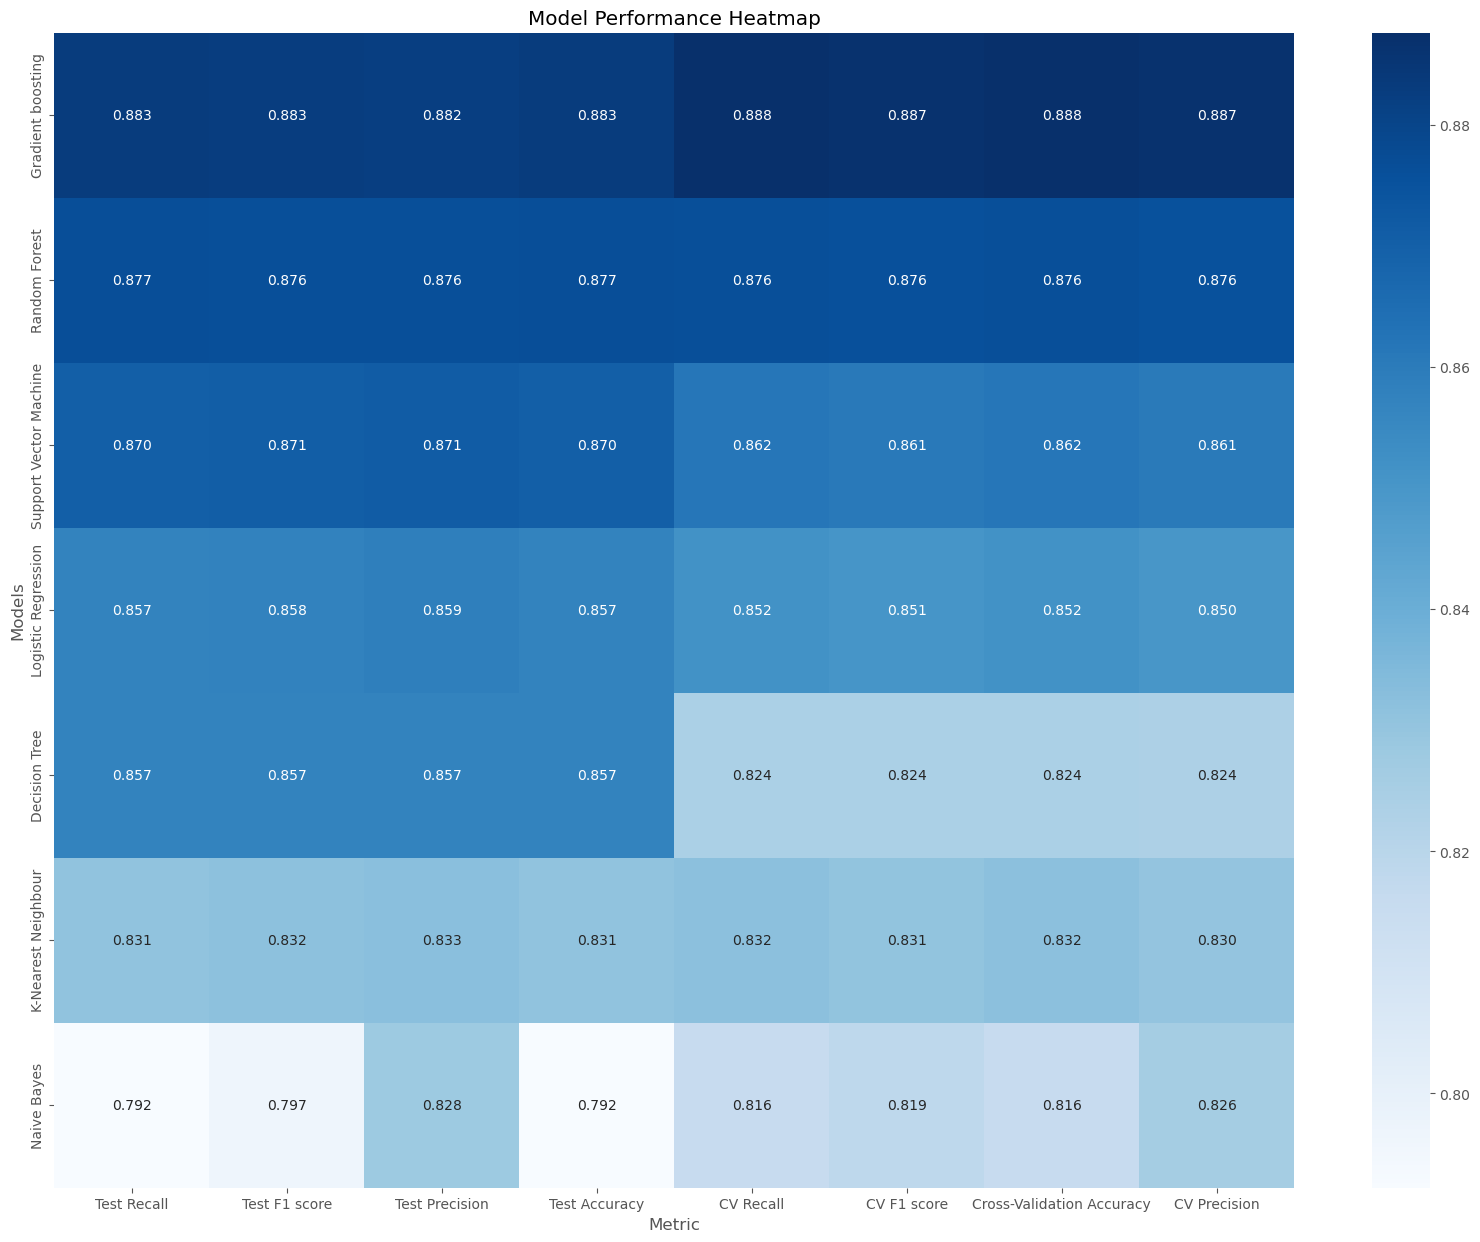

In [71]:
#heat map

heatmap_data = df_model_results_sorted.set_index('Model')[['Test Recall', 'Test F1 score', 'Test Precision', 'Test Accuracy', 'CV Recall', 'CV F1 score', 'Cross-Validation Accuracy','CV Precision' ]]
plt.figure(figsize=[20,15])
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.3f', cbar=True)
plt.title('Model Performance Heatmap')
plt.ylabel('Models')
plt.xlabel('Metric')

In [72]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)

feat_impo = gbc.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': feat_impo}).sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
4                    Insulin    0.682535
1                    Glucose    0.120727
7                        Age    0.056012
5                        BMI    0.040997
3              SkinThickness    0.035794
6   DiabetesPedigreeFunction    0.030935
0                Pregnancies    0.015942
2              BloodPressure    0.014330
13      insulin_class_Normal    0.001673
9             bmi_class_Over    0.000658
12            bmi_class_Extr    0.000393
14          glucose_class_Ok    0.000005
15         glucose_class_Pre    0.000000
8               bmi_class_Ok    0.000000
11            bmi_class_Obe2    0.000000
10           bmi_class_ Obe1    0.000000
16         glucose_class_Dia    0.000000